## Other Morphological Algorithms - Focus: Hole Filling ##

One of the most useful applications of morphological algorithms is the ability to extract image components that are useful for analysis further downstream. 

We will look at one common use-case: Hole Filling 

In [1]:
# Downloading essential libraries 
import skimage 
from skimage import data, io, filters, morphology
import matplotlib.pyplot as plt 

Recall that a 'hole' is simply a collection of background pixels surrounded by foreground pixels (object of interest)  
Refer to the binary image below to see several holes across multiple amorphous shapes reminiscent of cells:    

**Note the background (black) and the foreground (white)**  
![image](https://i.sstatic.net/j1ESv.png)  
*Photo taken from: https://stackoverflow.com/questions/22310489/filling-holes-in-objects-that-touch-the-border-of-an-image* 

### 3.1 Logic Behind the Algorithm ### 
Hole filling algorithm based on morphology can be expressed mathematically in the following manner: 

$$X_{k} = (X_{k-1} \oplus B) \cap I^c$$  $$k = 1, 2, 3, ...$$  

Say that there is a shape $A$ that has a hole in the image $I$

What hole-filling does:  
1. A new array $X$ of "0"'s is created with the same dimensions of $I$  
2. At each position of $X$ where there would be a hole in $I$, these pixel positions are set to "1" via dilation operation by structuring element $B$  
3. The conjunction/union operator with $I^c$ ensures that this iterative operation by $B$ becomes only valid for pixel positions within shape $A$ (the hole)  

Scikit-image provides condensed methods to perform such operations. Below is a more manual demonstration to provide more intuition using the `binary_dilation` method from scipy


In [5]:
# In terms of raw code, hole filling workflows work under the following logic: 

# Importing essential libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation
import skimage
from skimage.io import imread, imshow 

def donut(): 
    """Create simple bin. image with a hole in middle (donut) """
    img = np.zeros((12, 12), dtype=bool) # can change dimensions later

    # Rectangular object with a whole
    img[2:10, 2:10] = True 
    img[5:7, 5:7] = False # The hole 

    return img

def visuals(X_k, I_c, iteration, dilated= None): 
    """Visuals for iterations over hole filling procedure"""

    fig, axes = plt.subplots(1,3 if dilated is not None else 2, figsuze= (12,4))

### 3.2 Hole Filling Methods 
While the above attempts to explain the hole filling procedure, thankfully this is not necessary due to the use of existing methods from scikit image and by extension scipy library. 

C:\Users\zionp\AppData\Local\Temp\ipykernel_33868\3276901206.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img)


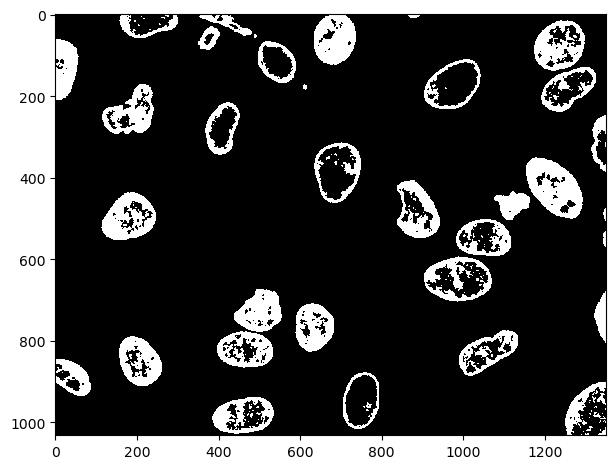

In [ ]:
img = imread('cell_holes.png') 
imshow(img)

### Applications beyond binary images: greyscale (focus on it the most) 